In [1]:
import cv2
import os
os.chdir('models')

first we have to detect the face then it will predict the Gender and Age.

Here iam training with the pretrained Caffee Model.

In [ ]:
#net=>ageNet,faceNet or GenderNet
#frame=>video frame
#confidence_threshold=>If the confidence is greater than confidence_threshold then detect the face otherwise not.Here iam keeping the 70per
def detectFace(net,frame,confidence_threshold=0.7):
    
    frameOpencvDNN=frame.copy()#copy the frame
    print(frameOpencvDNN.shape)
    frameHeight=frameOpencvDNN.shape[0]#Defining the frameHeight,zero'th index of frameOpencvDNN
    frameWidth=frameOpencvDNN.shape[1]#Defining the framewidth,first index of the frameOpencvDNN
    
    #cv2 network has deep neural network module to work with pytorch,tensorflow,Caffee
    #https://docs.opencv.org/master/d6/d0f/group__dnn.html
    #see in this:"Mat  cv::dnn::blobFromImages"
    #It will create 4dim blob from series of images
    
    #for cv2.dnn.blobFromImage
    #https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/
    #1.0=>Scalefactor=>why=>our video resolution is high so thats why we are doing scalefactor
    #227,227=>size=>It will resize the our resolution to 227,227(If our resolution size is 600*600 it will resize into 227*227)
    #mean=[124.96,115.97,106.13]=>124.96=R,115.97=G,106.13=B
    #swapRB=True=>open cv expects in BGR channel to convert into RGB we are giving swapRB=True
    #crop=False=>crop our videoframe or not
    blob=cv2.dnn.blobFromImage(frameOpencvDNN,1.0,(227,227),[124.96,115.97,106.13],swapRB=True,crop=False)#It will do preprocessing
    #feed into neural network
    net.setInput(blob)
    #show the output from neural network
    detections=net.forward()
    #Here detections has 6dim
    #print(detections)
    faceBoxes=[]
    for i in range(detections.shape[2]):
        confidence=detections[0,0,i,2]#3rd dim is confidence
        #if confidence is greater than threshold detect it otherwise not.
        if confidence>confidence_threshold:
            #To draw the rectangle we require 4 things i.e,x1,x2,y1,y2
            x1=int(detections[0,0,i,3]*frameWidth)#3rd is x1
            y1=int(detections[0,0,i,4]*frameHeight)#4th dim is y1
            x2=int(detections[0,0,i,5]*frameWidth)#5th dim is x2
            y2=int(detections[0,0,i,6]*frameHeight)#6th dim is y2
            faceBoxes.append([x1,y1,x2,y2])#store the x1,x2,y1,y2 in faceboxes
            #0,255,0 what color do you want to draw the rectangle
            #0=>Blue,255=>Green,0=>Red
            cv2.rectangle(frameOpencvDNN,(x1,y1),(x2,y2),(0,255,0),int(round(frameHeight/150)),8)#Draw the rectangle
    return frameOpencvDNN,faceBoxes
        
#calling the pretrained models for face,age,gender
faceProto='opencv_face_detector.pbtxt'
faceModel='opencv_face_detector_uint8.pb'
ageProto='age_deploy.prototxt'
ageModel='age_net.caffemodel'
genderProto='gender_deploy.prototxt'
genderModel='gender_net.caffemodel'

genderList=['Male','Female']
ageList=['(0-2)','(4-6)','(8-12)','(15-20)','(25-32)','(38-43)','(48-53)','(60-100)']

#read the caffe model it will also read darknet,tensorflow,pytorch.
faceNet=cv2.dnn.readNet(faceModel,faceProto)
ageNet=cv2.dnn.readNet(ageModel,ageProto)
genderNet=cv2.dnn.readNet(genderModel,genderProto)

video=cv2.VideoCapture(0)#capturing the video
padding=20
while cv2.waitKey(1)<0:
    hasFrame,frame=video.read()#Read the video
    if not hasFrame:
        cv2.waitKey()
        break
        
    resultImg,faceBoxes=detectFace(faceNet,frame)
    
    if not faceBoxes:
        print("No face detected")
    
    for faceBox in faceBoxes:
        face=frame[max(0,faceBox[1]-padding):min(faceBox[3]+padding,frame.shape[0]-1),max(0,faceBox[0]-padding):min(faceBox[2]+padding, frame.shape[1]-1)]#It is some extrapreprocessing
        blob=cv2.dnn.blobFromImage(face,1.0,(227,227),[124.96,115.97,106.13],swapRB=True,crop=False)#preprocessing
        genderNet.setInput(blob)#Feeding the gendernet to neural network
        genderPreds=genderNet.forward()#generating output from gendernet
        gender=genderList[genderPreds[0].argmax()]#from probabilities taking max value.
        
        ageNet.setInput(blob)#feeding the agenet to neural network
        agePreds=ageNet.forward()#generating output from agenet
        age=ageList[agePreds[0].argmax()]#from probabilities take max value.
        #cv2.FONT_HERSHEY_SIMPLEX=>which font you want
        #0.8=>Width
        #0,255,255=>Color of font[Combination of green and red]
        #
        cv2.putText(resultImg,f'{gender},{age}',(faceBox[0],faceBox[1]-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,255,255),2,cv2.LINE_AA)
        cv2.imshow("Detecting age and Gender",resultImg)
        
        
        if cv2.waitKey(33) & 0xFF == ord('q'):
            break
            
cv2.destroyAllWindows()
        

(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 640, 3)
(480, 

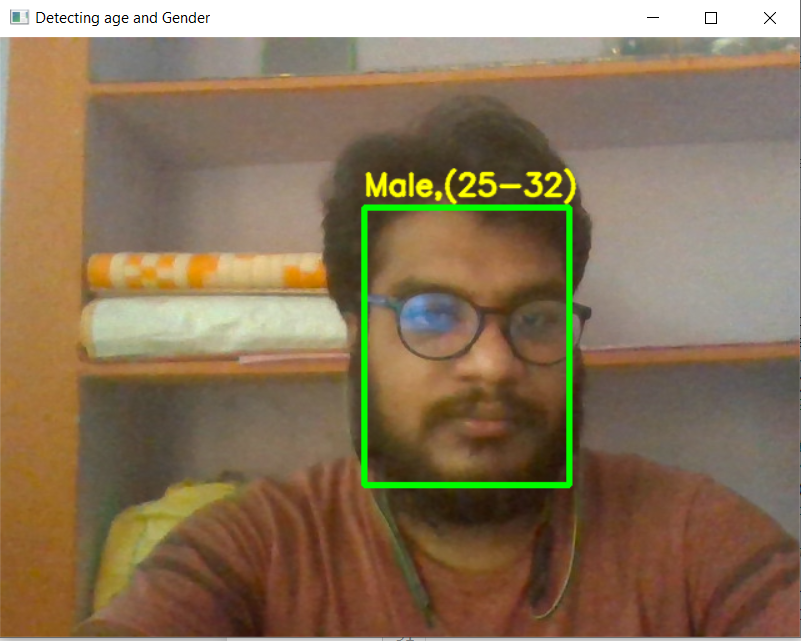

In [3]:
from IPython.display import Image
Image(filename='sample_output.png',width=400)